In [1]:
# import the required Python scientific libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set a custom figure style (optional, you can comment on this whole block)
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'white'

In [2]:
%run scripts/flow_laws_params.py
%run scripts/thermal_functions.py

functions loaded from 'flow_laws_params.py': 
 quartz,
 olivine, 
 olivine_Idrissi 

funtions loaded from 'thermal_functions.py': 
 turcotte_schubert_model 
 thermal_conductivity loaded


In [3]:
moho = 38.8 # Continental crust thickness [m], average from Hacker et al. (2015)
T0 = 7.5  # surface T (taken from the KTB superdeep borehole)

# Average heat parameters for the crust
Jq_crust = 65  # Average heat flux [mW m**-2] from Jaupar and Mareschal (2007)
A_crust = 0.97  # Average rate of radiogenic heat production [microW m**-3] from Huang et al. (2013)
K_crust = 2.51  # Coefficient of thermal conductivity [W m**-1 K**-1] from Sclater et al. (1980)

In [4]:
# generate a linear spaced array of depths every 10 m
depths = np.linspace(start=0, stop=moho, num=3880)

In [5]:
# now we call the function "turcotte_schubert_model" and pass the different arguments in order
T_crust = turcotte_schubert_model(depths, thermal=(T0, Jq_crust, A_crust, K_crust))

In [6]:
dataset = pd.DataFrame({'depths_km': depths,
                        'Tmodel1_C': T_crust})
dataset

,depths_km,Tmodel1_C
0,0.000000,7.500000
1,0.010003,7.759012
2,0.020005,8.017984
3,0.030008,8.276919
4,0.040010,8.535814
...,...,...
3875,38.759990,720.952582
3876,38.769992,721.061766
3877,38.779995,721.170910
3878,38.789997,721.280016


In [7]:
dataset['Tmodel2_C'] = 20 * depths
dataset

,depths_km,Tmodel1_C,Tmodel2_C
0,0.000000,7.500000,0.000000
1,0.010003,7.759012,0.200052
2,0.020005,8.017984,0.400103
3,0.030008,8.276919,0.600155
4,0.040010,8.535814,0.800206
...,...,...,...
3875,38.759990,720.952582,775.199794
3876,38.769992,721.061766,775.399845
3877,38.779995,721.170910,775.599897
3878,38.789997,721.280016,775.799948


In [8]:
# set some data
ro_crust = 2750  # average rock density in the crust [kg/m**3]
g = 9.80665      # average gravitational acceleration [m/s**2]
tp_T = 500       # Al2SiO5 triple point T in C degrees
tp_P = 380000    # Al2SiO5 triple point P in Pas
tp_depth = tp_P / (ro_crust * g)
Ky_And_T = 155    # Ky-And transition at room P in C degrees
And_Sill_T = 603  # And-Sill transition at room P in C degrees
Ky_Sill_T = 697   # ~Ky-Sill transition at Moho (38.8 km) P in C degrees

(-55.0, 950.0)

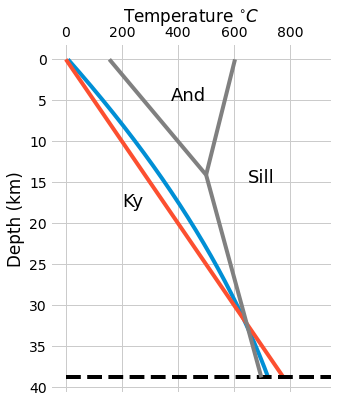

In [9]:
# plot the geotherm for the entire lithosphere
fig1, ax = plt.subplots(figsize=(4.5, 6))

# tweak the figure so that the depth is shown on the y-axis downwards
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

ax.plot(dataset['Tmodel1_C'], dataset['depths_km'], label='ts model')
ax.plot(dataset['Tmodel2_C'], dataset['depths_km'], label='linear model')
ax.plot([0, 1100], [moho, moho], color='black', linestyle='dashed')
ax.set(xlabel='Temperature $^{\circ}C$', ylabel='Depth (km)')

# plot Al2SiO4 stability fields
ax.plot([Ky_And_T, tp_T], [0, tp_depth], color='grey')  # Ky-And line
ax.plot([tp_T, And_Sill_T], [tp_depth, 0], color='grey')  # And-Sill line
ax.plot([tp_T, Ky_Sill_T], [tp_depth, moho], color='grey')  # Ky-Sill line
ax.annotate(text='And', xy=(375, 5), fontsize=18)
ax.annotate(text='Sill', xy=(650, 15), fontsize=18)
ax.annotate(text='Ky', xy=(200, 18), fontsize=18)

ax.set_xlim(xmax=950)

In [10]:
quartz()

Available flow laws:
'HTD' from Hirth et al. (2004)
'LP_wet' from Luan and Paterson (1992)
'GT_wet' from Gleason and Tullis (1995)
'HK_wet' from Holyoke and Kronenberg (2010)
'RB_wet' from Rutter and Brodie (2004)


In [11]:
ro_crust = 2750   # average rock density in the crust [kg/m**3]
ref_sr = 1.0e-14  # Reference average shear strain rate in the ductile lithosphere 
g = 9.80665       # average gravitational acceleration [m/s**2]

In [12]:
dataset['pressure_MPa'] = (ro_crust * g * dataset['depths_km']) / 1e3  # /1e3 to obtain MPa
dataset

,depths_km,Tmodel1_C,Tmodel2_C,pressure_MPa
0,0.000000,7.500000,0.000000,0.000000
1,0.010003,7.759012,0.200052,0.269752
2,0.020005,8.017984,0.400103,0.539505
3,0.030008,8.276919,0.600155,0.809257
4,0.040010,8.535814,0.800206,1.079010
...,...,...,...,...
3875,38.759990,720.952582,775.199794,1045.290545
3876,38.769992,721.061766,775.399845,1045.560298
3877,38.779995,721.170910,775.599897,1045.830050
3878,38.789997,721.280016,775.799948,1046.099803


In [13]:
n, E, A = quartz('HTD')

In [14]:
quartz('HTD')

(4.0, 135000, 6.309573444801943e-12)

In [15]:
def power_law_creep(srate, A, n, exp_fact, gsize=(1, 0), water=(1,0)):
    """ Return the neccesary differential stress (Tresca criterion) in
    MPa for permanently deforming a polycrystalline material at a given
    environmental conditions.

    Parameters (scalars and tuples, all positive values)
    ----------
    srate : strain rate [s**-1]
    n : stress exponent
    A : material constant [MPa**-n s**-1]
    exp_fact : tuple of dim 4 (E, T, P, V)
        E : activation energy [J mol**-1]
        T : absolute temperature [K]
        P : pressure [MPa]
        V : activation volume per mol [m**3 mol**-1]
    gsize : optional, tuple of dim 2 (d, m); (1, 0) by default
        d : average grain size [microns]
        m : grain size exponent [in absolute value]
    water : optional, tuple of dim 2 (f, r); (1, 0) by default
        f : fugacity of water [water molecules per 1e6 Si atoms]
        r : water fugacity exponent

    Assumptions
    -----------
    - Steady-state creep
    - Low to moderate stress regime (< 200 MPa)
    - Effect of partial melt ignored
    """
    # set universal gas constant [J mol**-1 K**-1]
    R = 8.3144626 
    
    # extract parameters
    E, T, P, V = exp_fact
    d, m = gsize
    f, r = water

    return (srate * (d**-m) * (f**r) * np.exp((E + P * V) / (R * T)) / A)**(1 / n)

In [16]:
dataset['model_HTD'] = power_law_creep(srate=1e-14, A=A, n=n,
                                       exp_fact=(E, dataset['Tmodel1_C'] + 273.15, dataset['pressure_MPa'], 1))
dataset

,depths_km,Tmodel1_C,Tmodel2_C,pressure_MPa,model_HTD
0,0.000000,7.500000,0.000000,0.000000,381447.543528
1,0.010003,7.759012,0.200052,0.269752,376405.168573
2,0.020005,8.017984,0.400103,0.539505,371439.292966
3,0.030008,8.276919,0.600155,0.809257,366548.617149
4,0.040010,8.535814,0.800206,1.079010,361731.865885
...,...,...,...,...,...
3875,38.759990,720.952582,775.199794,1045.290545,12.220068
3876,38.769992,721.061766,775.399845,1045.560298,12.214647
3877,38.779995,721.170910,775.599897,1045.830050,12.209231
3878,38.789997,721.280016,775.799948,1046.099803,12.203821


(-10.0, 900.0)

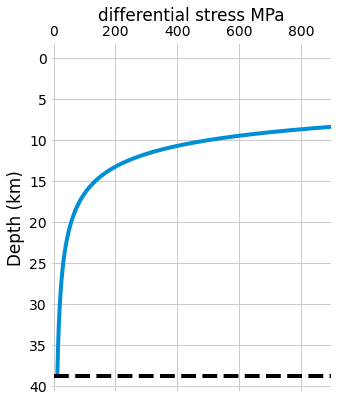

In [17]:
# plot the geotherm for the entire lithosphere
fig2, ax = plt.subplots(figsize=(4.5, 6))

# tweak the figure so that the depth is shown on the y-axis downwards
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

ax.plot(dataset['model_HTD'], dataset['depths_km'], label='HTD model')
ax.plot([0, 1100], [moho, moho], color='black', linestyle='dashed')
ax.set(xlabel='differential stress MPa', ylabel='Depth (km)')

ax.set_xlim(left=-10, right=900)